## Medical insurance cost prediction using Machine Learning

#### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#### Data Collection and Analysis

In [2]:
# Loading the data from csv file to a Pandas DataFrame
df = pd.read_csv("C:/Users/ASUS/Desktop/Data science project/insurance (1).csv")

# First rows of data
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Number of rows and columns
df.shape

(1338, 7)

In [4]:
# getting some info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Here, we have 3 categorical features:
* sex
* smoker
* region

In [5]:
# checking missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Data Analysis

In [6]:
# statistical measures
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


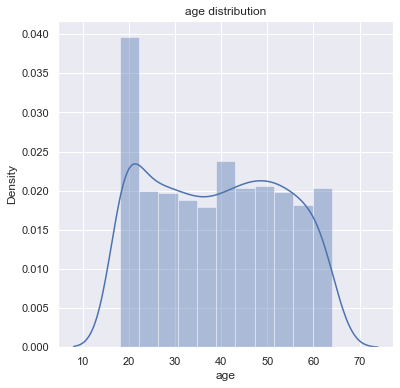

In [7]:
# distribution of age values
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title("age distribution")
plt.show()


Text(0.5, 1.0, 'sex distribution')

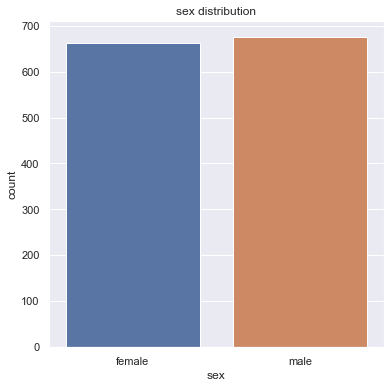

In [8]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=df)
plt.title("sex distribution")

In [9]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


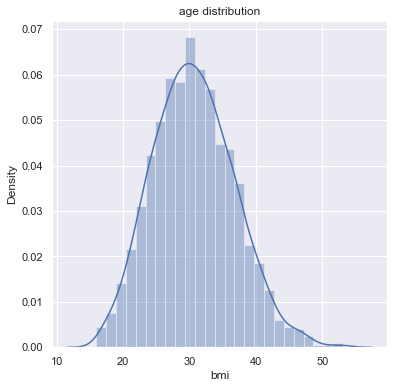

In [10]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(df['bmi'])
plt.title("age distribution")
plt.show()

Normal bmi range is 18.5 to 24.9. From above plot, more number of peoples are overweighted.

Text(0.5, 1.0, 'children distribution')

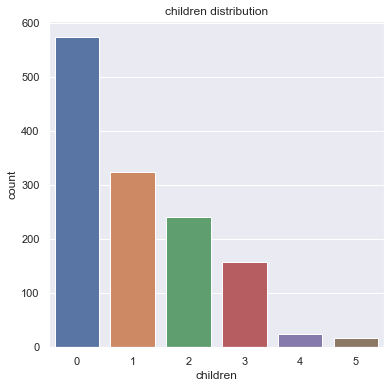

In [11]:
# Children column
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=df)
plt.title("children distribution")

In [12]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

Text(0.5, 1.0, 'smoker distribution')

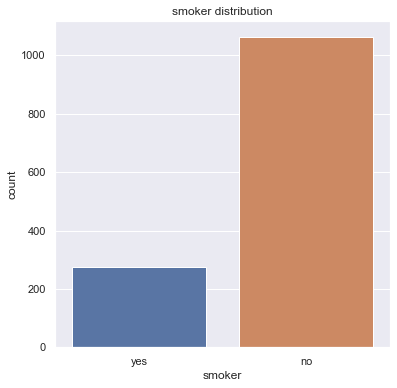

In [13]:
# smoker distribution
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=df)
plt.title("smoker distribution")

In [14]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

Text(0.5, 1.0, 'region distribution')

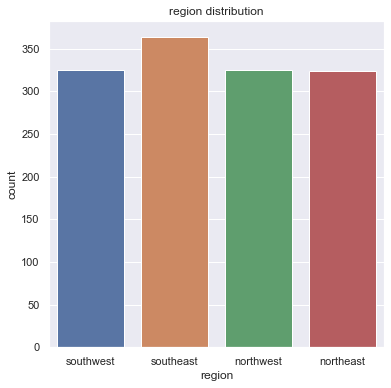

In [15]:
# region distribution
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=df)
plt.title("region distribution")

In [16]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


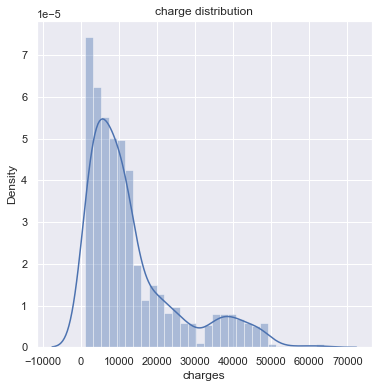

In [17]:
# charges distribution
plt.figure(figsize=(6,6))
sns.distplot(df['charges'])
plt.title("charge distribution")
plt.show()

### Data Pre-processing

#### Encoding the categorical variables

In [18]:
# Encoding sex column
df.replace({'sex':{'male':0,'female':1}}, inplace= True)

# Encoding smoker column
df.replace({'smoker':{'yes':0,'no':1}},inplace =True)

#Encoding region column
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace =True)

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


### Train-test split data

In [23]:
# independent variables
x = df.drop(columns='charges', axis=1)
# dependent variable
y = df['charges']

In [24]:
# splitting data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [25]:
print(x.shape,x_train.shape,x_test.shape)

(1338, 6) (1070, 6) (268, 6)


### Model training

In [26]:
# loading the linear regression model
lm = LinearRegression()

# fitting regression model
lm.fit(x_train, y_train)

LinearRegression()

### Model evaluation

In [27]:
# prediction on training data
training_data_pred = lm.predict(x_train)

In [28]:
# R-square values
r2_train = metrics.r2_score(y_train, training_data_pred)
print('r square value:',r2_train)

r square value: 0.7367384013702085


In [29]:
# prediction on test data
testing_data_pred = lm.predict(x_test)

In [30]:
# R-square values
r2_test = metrics.r2_score(y_test, testing_data_pred)
print('r square value:',r2_test)

r square value: 0.7989875396812892


### Building a predictive system

In [35]:
input_data = (31,1,25.74,0,1,0)

# changing input data from tuple to numpy array
input_array = np.asarray(input_data)

# reshape the array
input_reshape = input_array.reshape(1,-1)

prediction = lm.predict(input_reshape)
print('The insurance cost in USD is:',prediction[0])

The insurance cost in USD is: 3791.4668647162543
